In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
import sys

```python

    # Load the dataset
    # Preprocess the data 
    # Perform feature scaling
    # Calculate the distance matrix from input features
    train_dist_mat = distance_matrix(data, data)

    # Initialize the unsupervised learning model
    model = KMeans(n_clusters=3)  # Specify the number of clusters
    # Fit the model to the distance matrix
    model.fit(distance_matrix)
    # Get the predicted labels for the data points
    labels = model.labels_
    # Perform further analysis or visualization with the obtained labels

    # ...

    # Evaluate the performance of the model (if applicable)
    # ...

    # Save the model (if needed)
    # ...

    pass
```

## Helper Function

In [2]:
from utils import printStats, plot_dist_mat, draw_distribution, scale_feat
from train import *

## Prepare training data 
### filter data with hour = 18, RESOURCEBID_SEQ = 100651

In [3]:
train_file = "train_combined_pub_0313_0905.csv" # train_file = "train_combined.csv"
df = read_data(train_file)
df

,STARTTIME,STOPTIME,RESOURCE_TYPE,SCHEDULINGCOORDINATOR_SEQ,RESOURCEBID_SEQ,TIMEINTERVALSTART,TIMEINTERVALEND,PRODUCTBID_DESC,PRODUCTBID_MRID,MARKETPRODUCT_DESC,...,SCH_BID_TIMEINTERVALSTART,SCH_BID_TIMEINTERVALSTOP,SCH_BID_TIMEINTERVALSTART_GMT,SCH_BID_TIMEINTERVALSTOP_GMT,SCH_BID_XAXISDATA,SCH_BID_Y1AXISDATA,SCH_BID_Y2AXISDATA,SCH_BID_CURVETYPE,MINEOHSTATEOFCHARGE,MAXEOHSTATEOFCHARGE
0,2023-03-13T00:00:00,2023-03-13T01:00:00,GENERATOR,660085,124064,NaN,NaN,NaN,NaN,NaN,...,2023-03-13 00:00:00,2023-03-13 01:00:00,2023-03-13T07:00:00-00:00,2023-03-13T08:00:00-00:00,62.00,68.49,NaN,BIDPRICE,NaN,NaN
1,2023-03-13T00:00:00,2023-03-13T01:00:00,GENERATOR,660085,124064,NaN,NaN,NaN,NaN,NaN,...,2023-03-13 00:00:00,2023-03-13 01:00:00,2023-03-13T07:00:00-00:00,2023-03-13T08:00:00-00:00,227.00,68.51,NaN,BIDPRICE,NaN,NaN
2,2023-03-13T00:00:00,2023-03-13T01:00:00,GENERATOR,660085,124064,NaN,NaN,NaN,NaN,NaN,...,2023-03-13 00:00:00,2023-03-13 01:00:00,2023-03-13T07:00:00-00:00,2023-03-13T08:00:00-00:00,228.00,68.52,NaN,BIDPRICE,NaN,NaN
3,2023-03-13T00:00:00,2023-03-13T01:00:00,GENERATOR,660085,124064,NaN,NaN,NaN,NaN,NaN,...,2023-03-13 00:00:00,2023-03-13 01:00:00,2023-03-13T07:00:00-00:00,2023-03-13T08:00:00-00:00,229.00,68.62,NaN,BIDPRICE,NaN,NaN
4,2023-03-13T00:00:00,2023-03-13T01:00:00,GENERATOR,660085,124064,NaN,NaN,NaN,NaN,NaN,...,2023-03-13 00:00:00,2023-03-13 01:00:00,2023-03-13T07:00:00-00:00,2023-03-13T08:00:00-00:00,253.00,68.62,NaN,BIDPRICE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999044,2023-09-05T23:00:00,2023-09-06T00:00:00,GENERATOR,575998,939640,NaN,NaN,NaN,NaN,NaN,...,2023-09-05 23:00:00,2023-09-06 00:00:00,2023-09-06T06:00:00-00:00,2023-09-06T07:00:00-00:00,0.00,26.69,NaN,BIDPRICE,NaN,NaN
4999045,2023-09-05T23:00:00,2023-09-06T00:00:00,GENERATOR,575998,939640,NaN,NaN,NaN,NaN,NaN,...,2023-09-05 23:00:00,2023-09-06 00:00:00,2023-09-06T06:00:00-00:00,2023-09-06T07:00:00-00:00,40.00,98.16,NaN,BIDPRICE,NaN,NaN
4999046,2023-09-05T23:00:00,2023-09-06T00:00:00,GENERATOR,575998,939640,NaN,NaN,NaN,NaN,NaN,...,2023-09-05 23:00:00,2023-09-06 00:00:00,2023-09-06T06:00:00-00:00,2023-09-06T07:00:00-00:00,41.00,998.99,NaN,BIDPRICE,NaN,NaN
4999047,2023-09-05T23:00:00,2023-09-06T00:00:00,GENERATOR,575998,939640,NaN,NaN,NaN,NaN,NaN,...,2023-09-05 23:00:00,2023-09-06 00:00:00,2023-09-06T06:00:00-00:00,2023-09-06T07:00:00-00:00,41.01,999.00,NaN,BIDPRICE,NaN,NaN


## Preprocess the input

In [4]:
#drop columns

columns_to_drop = ['MAXEOHSTATEOFCHARGE','PRODUCTBID_DESC','PRODUCTBID_MRID', 'MARKETPRODUCT_DESC', 'SCH_BID_Y2AXISDATA', 'MINEOHSTATEOFCHARGE', 'MAXEOHSTATEOFCHARGE', 'STARTTIME', 'STOPTIME', 'RESOURCE_TYPE', 'TIMEINTERVALSTART', 'TIMEINTERVALEND', 'MARKETPRODUCTTYPE', 'SCH_BID_TIMEINTERVALSTART_GMT', 'SCH_BID_TIMEINTERVALSTOP_GMT', 'SCH_BID_CURVETYPE']
df_droped = df.drop(columns=columns_to_drop, axis="columns")

#filter rows
HOUR = 12 #None #12
RESOURCEBID_SEQ = 100651 #None #100651
df_train = filter_rows(df_droped, HOUR, RESOURCEBID_SEQ)
df_train

,SCHEDULINGCOORDINATOR_SEQ,RESOURCEBID_SEQ,SELFSCHEDMW,SCH_BID_TIMEINTERVALSTART,SCH_BID_TIMEINTERVALSTOP,SCH_BID_XAXISDATA,SCH_BID_Y1AXISDATA,hr_start,hr_stop
1858,917730,100651,NaN,2023-03-13,2023-03-14,0.0,999.99,0.0,24.0
1859,917730,100651,NaN,2023-03-13,2023-03-14,1.0,1000.00,0.0,24.0
1860,917730,100651,NaN,2023-03-13,2023-03-14,56.0,1000.00,0.0,24.0
30195,917730,100651,NaN,2023-03-14,2023-03-15,0.0,999.99,0.0,24.0
30196,917730,100651,NaN,2023-03-14,2023-03-15,1.0,1000.00,0.0,24.0
...,...,...,...,...,...,...,...,...,...
4945447,917730,100651,NaN,2023-09-04,2023-09-05,1.0,999.00,0.0,24.0
4945448,917730,100651,NaN,2023-09-04,2023-09-05,104.0,999.00,0.0,24.0
4975502,917730,100651,NaN,2023-09-05,2023-09-06,0.0,998.99,0.0,24.0
4975503,917730,100651,NaN,2023-09-05,2023-09-06,1.0,999.00,0.0,24.0


In [5]:
print(f"For resource_id {RESOURCEBID_SEQ} at hour {HOUR}:")
printStats(df_train, type=False, topFewRow=False)

# subplot 3: draw bid curves
from draw_bid_curve import draw_bid_curves_for_multiple_days_2d
draw_bid_curves_for_multiple_days_2d(df_train, HOUR)

For resource_id 100651 at hour 12:
size of data is: (517, 9)
Statistics in data:
        SCHEDULINGCOORDINATOR_SEQ  RESOURCEBID_SEQ  SELFSCHEDMW  \
count                      517.0            517.0          0.0   
mean                    917730.0         100651.0          NaN   
min                     917730.0         100651.0          NaN   
25%                     917730.0         100651.0          NaN   
50%                     917730.0         100651.0          NaN   
75%                     917730.0         100651.0          NaN   
max                     917730.0         100651.0          NaN   
std                          0.0              0.0          NaN   

           SCH_BID_TIMEINTERVALSTART       SCH_BID_TIMEINTERVALSTOP  \
count                            517                            517   
mean   2023-06-08 09:36:12.533849344  2023-06-09 04:20:25.531915008   
min              2023-03-13 00:00:00            2023-03-14 00:00:00   
25%              2023-04-25 00:00:00   

## Create feature matrix


$$
feature\ i:\ x_i = 


\begin{bmatrix}
max\_price \\
min\_price \\
avg\_price \\
price\_range \\
num\_steps
\end{bmatrix}
$$

In [6]:
df_train_feat = extract_feat_from_bid(df_train)
print("\nStatistics before scaling:")
printStats(df_train_feat, type=False)


Statistics before scaling:
size of data is: (174, 5)
Statistics in data:
          max_price    min_price    avg_price  price_range   num_steps
count   174.000000   174.000000   174.000000   174.000000  174.000000
mean    946.137931   703.838046   861.884713   242.299885    2.971264
std     218.529197   448.840137   247.065886   422.853602    0.272606
min      30.000000    -5.000000    30.000000     0.000000    2.000000
25%    1000.000000    50.000000   678.333333     0.010000    3.000000
50%    1000.000000   999.990000   999.996667     0.010000    3.000000
75%    1000.000000   999.990000   999.996667    48.750000    3.000000
max    1000.000000  1000.000000  1000.000000  1005.000000    4.000000
Top few rows in data:
            max_price  min_price   avg_price  price_range  num_steps
2023-03-13     1000.0     999.99  999.996667         0.01          3
2023-03-14     1000.0     999.99  999.996667         0.01          3
2023-03-15     1000.0     999.99  999.996667         0.01         

## Feature scaling

$$
z_i = \frac{x_i - \mu}{\sigma}
$$


where 
 *  $z_i$ is the scaled value,
 *  $x_i$ is the original value,
 *  ${\mu}$ is the mean of the feature,
 *  ${\sigma}$ is the standard deviation of the feature $X$.

In [7]:
df_train_feat_scaled = scale_feat(df_train_feat)
print("\nStatistics after scaling:")
printStats(df_train_feat_scaled, type=False)


Statistics after scaling:
size of data is: (174, 5)
Statistics in data:
           max_price     min_price     avg_price   price_range     num_steps
count  1.740000e+02  1.740000e+02  1.740000e+02  1.740000e+02  1.740000e+02
mean  -1.020895e-16  3.266863e-16 -3.675221e-16 -3.675221e-16  6.125368e-17
std    1.002886e+00  1.002886e+00  1.002886e+00  1.002886e+00  1.002886e+00
min   -4.204390e+00 -1.583824e+00 -3.376774e+00 -5.746650e-01 -3.573170e+00
25%    2.471867e-01 -1.460932e+00 -7.450689e-01 -5.746413e-01  1.057151e-01
50%    2.471867e-01  6.617203e-01  5.606219e-01 -5.746413e-01  1.057151e-01
75%    2.471867e-01  6.617203e-01  5.606219e-01 -4.590441e-01  1.057151e-01
max    2.471867e-01  6.617427e-01  5.606354e-01  1.808903e+00  3.784600e+00
Top few rows in data:
            max_price  min_price  avg_price  price_range  num_steps
2023-03-13   0.247187    0.66172   0.560622    -0.574641   0.105715
2023-03-14   0.247187    0.66172   0.560622    -0.574641   0.105715
2023-03-15   0.2

## Distribution

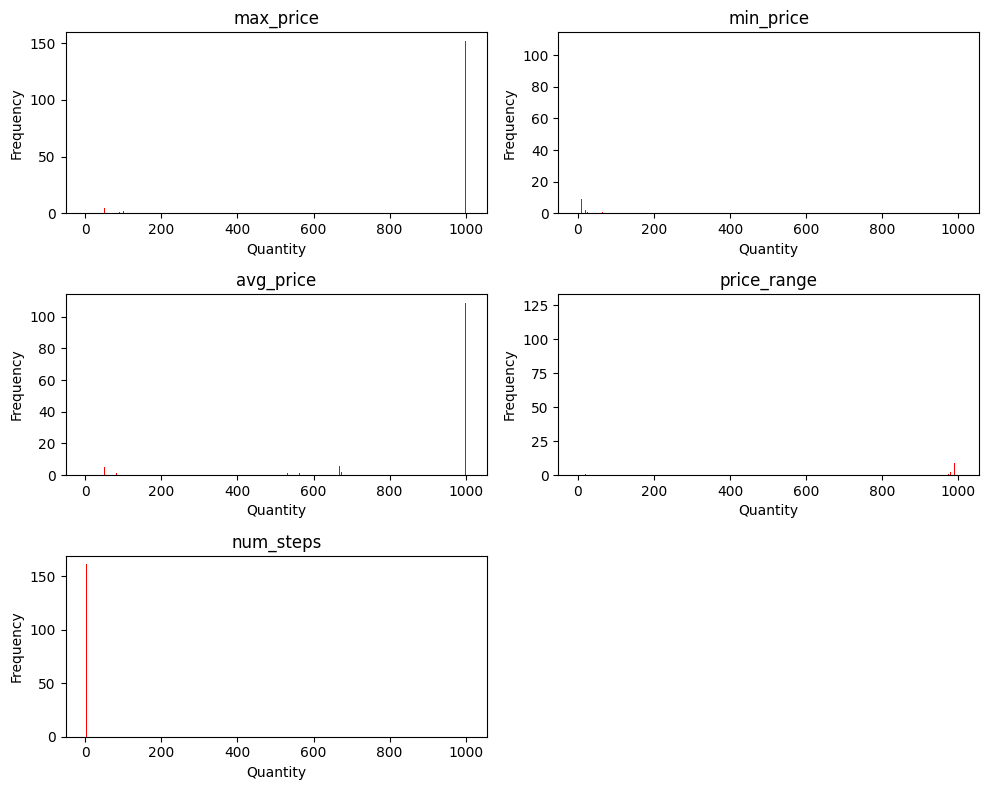

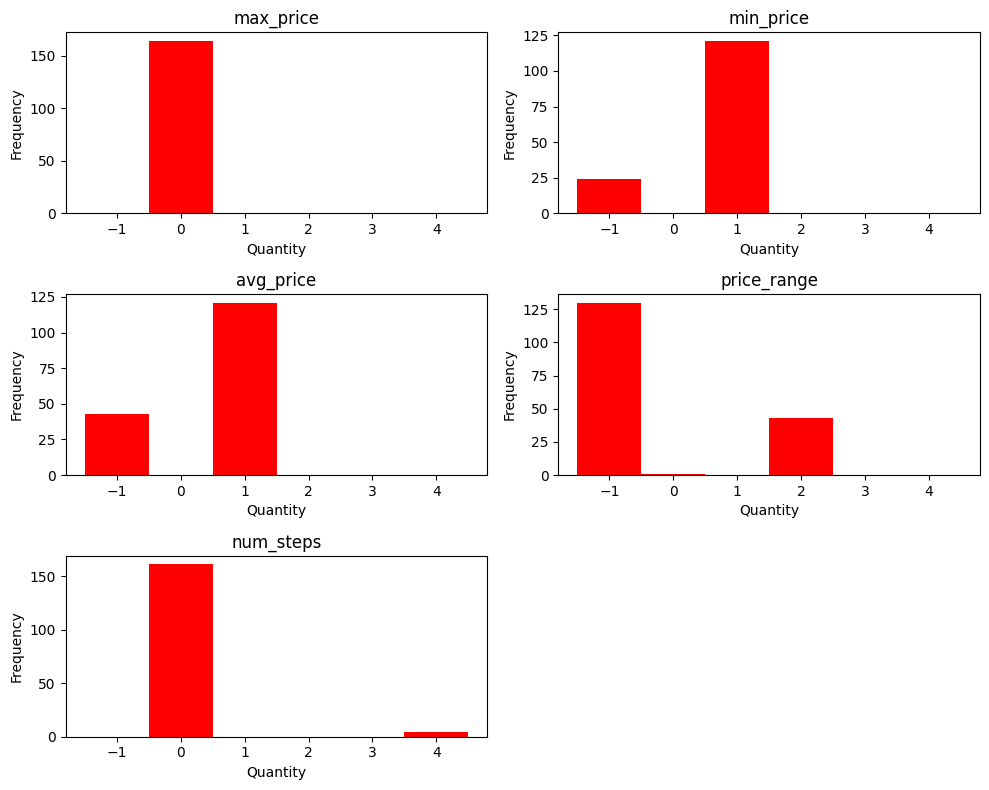

In [8]:
draw_distribution(df_train_feat)
draw_distribution(df_train_feat_scaled)


## Plot distance matrix for scaled features

In [9]:
# subplot 1: distance matrix of scaled feature
plot_dist_mat(df_train_feat_scaled)
# plot_dist_mat(df_train_feat)

## Clustering

In [10]:
# subplot 2 (cluster error vs number of clusters)
from train import plot_inter_intra_err

import plotly.graph_objects as go

min_clusters=2
max_clusters=10
plot_inter_intra_err(df_train_feat_scaled, min_clusters=min_clusters, max_clusters=max_clusters)


## We want intercluster as large as possible and intra-cluster as small as possible -> pick the intersection

## Or: Choose cluster number at the elbow
<div style="text-align: center;">
    <img src="./img/k_selection.jpg" width="50%" />
</div>
source: Machine Learning by Andrew Ng from coursera

In [11]:
model, n_cluster = find_best_model(df_train_feat_scaled, min_clusters=min_clusters, max_clusters=max_clusters)


In [12]:
print(f"num of points: {len(df_train_feat_scaled)}")

kmeans, n_cluster = find_best_model(df_train_feat_scaled, min_clusters=min_clusters, max_clusters=max_clusters)
centroid = kmeans.cluster_centers_

# assign the cluster labels to each bid
df_train_feat_scaled['cluster_label'] = kmeans.labels_
df_train_feat_scaled.head()

num of points: 174


,max_price,min_price,avg_price,price_range,num_steps,cluster_label
2023-03-13,0.247187,0.66172,0.560622,-0.574641,0.105715,1
2023-03-14,0.247187,0.66172,0.560622,-0.574641,0.105715,1
2023-03-15,0.247187,0.66172,0.560622,-0.574641,0.105715,1
2023-03-16,0.247187,0.66172,0.560622,-0.574641,0.105715,1
2023-03-17,0.247187,0.66172,0.560622,-0.574641,0.105715,1


In [13]:
cluster_labels = df_train_feat_scaled[['cluster_label']].copy()
cluster_labels.head()

,cluster_label
2023-03-13,1
2023-03-14,1
2023-03-15,1
2023-03-16,1
2023-03-17,1


## Show clustering results

In [14]:
# subplot 4: draw bid curves with cluster labels
from draw_bid_curve import draw_bid_curves_for_multiple_days_2d
draw_bid_curves_for_multiple_days_2d(df_train, HOUR, cluster_labels)

## Testing

In [15]:
valid_file = "valid_combined_pub_0906_1023.csv"
df_valid_raw = pd.read_csv(valid_file, low_memory=False)
df_valid_raw["SCH_BID_TIMEINTERVALSTART"] = pd.to_datetime(df_valid_raw["SCH_BID_TIMEINTERVALSTART"])
df_valid_raw["SCH_BID_TIMEINTERVALSTOP"] = pd.to_datetime(df_valid_raw["SCH_BID_TIMEINTERVALSTOP"])

printStats(df_valid_raw)

size of data is: (1244549, 22)
type of each column is:
STARTTIME                                object
STOPTIME                                 object
RESOURCE_TYPE                            object
SCHEDULINGCOORDINATOR_SEQ                 int64
RESOURCEBID_SEQ                           int64
TIMEINTERVALSTART                        object
TIMEINTERVALEND                          object
PRODUCTBID_DESC                         float64
PRODUCTBID_MRID                         float64
MARKETPRODUCT_DESC                      float64
MARKETPRODUCTTYPE                        object
SELFSCHEDMW                             float64
SCH_BID_TIMEINTERVALSTART        datetime64[ns]
SCH_BID_TIMEINTERVALSTOP         datetime64[ns]
SCH_BID_TIMEINTERVALSTART_GMT            object
SCH_BID_TIMEINTERVALSTOP_GMT             object
SCH_BID_XAXISDATA                       float64
SCH_BID_Y1AXISDATA                      float64
SCH_BID_Y2AXISDATA                      float64
SCH_BID_CURVETYPE                

### drop columns

In [17]:
df_valid_raw_col_droped = df_valid_raw.drop(columns=columns_to_drop, axis='columns')

printStats(df_valid_raw_col_droped)

size of data is: (1244549, 7)
type of each column is:
SCHEDULINGCOORDINATOR_SEQ             int64
RESOURCEBID_SEQ                       int64
SELFSCHEDMW                         float64
SCH_BID_TIMEINTERVALSTART    datetime64[ns]
SCH_BID_TIMEINTERVALSTOP     datetime64[ns]
SCH_BID_XAXISDATA                   float64
SCH_BID_Y1AXISDATA                  float64
dtype: object
Statistics in data:
        SCHEDULINGCOORDINATOR_SEQ  RESOURCEBID_SEQ    SELFSCHEDMW  \
count               1.244549e+06     1.244549e+06  159726.000000   
mean                4.050901e+05     4.276710e+05      29.673578   
min                 1.042980e+05     1.002320e+05    -230.000000   
25%                 1.874960e+05     1.666000e+05       0.570000   
50%                 4.174540e+05     3.271420e+05       1.800000   
75%                 6.212000e+05     6.935430e+05      12.200000   
max                 9.879900e+05     9.989640e+05    1150.000000   
std                 2.347220e+05     2.913479e+05     121.4

In [18]:
df_valid = filter_rows(df_valid_raw_col_droped, HOUR, RESOURCEBID_SEQ)
printStats(df_valid)

size of data is: (127, 9)
type of each column is:
SCHEDULINGCOORDINATOR_SEQ             int64
RESOURCEBID_SEQ                       int64
SELFSCHEDMW                         float64
SCH_BID_TIMEINTERVALSTART    datetime64[ns]
SCH_BID_TIMEINTERVALSTOP     datetime64[ns]
SCH_BID_XAXISDATA                   float64
SCH_BID_Y1AXISDATA                  float64
hr_start                            float64
hr_stop                             float64
dtype: object
Statistics in data:
        SCHEDULINGCOORDINATOR_SEQ  RESOURCEBID_SEQ  SELFSCHEDMW  \
count                      127.0            127.0          0.0   
mean                    917730.0         100651.0          NaN   
min                     917730.0         100651.0          NaN   
25%                     917730.0         100651.0          NaN   
50%                     917730.0         100651.0          NaN   
75%                     917730.0         100651.0          NaN   
max                     917730.0         100651.0        

In [19]:
print(f"For resource_id {RESOURCEBID_SEQ} at hour {HOUR}:")
printStats(df_valid, type=False, topFewRow=False)

from draw_bid_curve import draw_bid_curves_for_multiple_days_2d
draw_bid_curves_for_multiple_days_2d(df_valid, HOUR)

For resource_id 100651 at hour 12:
size of data is: (127, 9)
Statistics in data:
        SCHEDULINGCOORDINATOR_SEQ  RESOURCEBID_SEQ  SELFSCHEDMW  \
count                      127.0            127.0          0.0   
mean                    917730.0         100651.0          NaN   
min                     917730.0         100651.0          NaN   
25%                     917730.0         100651.0          NaN   
50%                     917730.0         100651.0          NaN   
75%                     917730.0         100651.0          NaN   
max                     917730.0         100651.0          NaN   
std                          0.0              0.0          NaN   

           SCH_BID_TIMEINTERVALSTART       SCH_BID_TIMEINTERVALSTOP  \
count                            127                            127   
mean   2023-09-29 22:27:52.440945152  2023-09-30 07:43:56.220472576   
min              2023-09-06 00:00:00            2023-09-07 00:00:00   
25%              2023-09-18 00:00:00   

In [20]:
df_valid_feat = extract_feat_from_bid(df_valid)
print("\nStatistics before scaling:")
printStats(df_valid_feat, type=False)



Statistics before scaling:
size of data is: (44, 5)
Statistics in data:
          max_price   min_price   avg_price  price_range  num_steps
count    44.000000   44.000000   44.000000    44.000000  44.000000
mean    888.204545  330.746818  702.385303   557.457727   2.886364
std     314.824320  461.813844  288.887632   491.628732   0.321038
min      15.000000    5.000000   15.000000     0.000000   2.000000
25%     999.000000   18.000000  670.666667     0.010000   3.000000
50%    1000.000000   20.000000  673.333333   970.000000   3.000000
75%    1000.000000  998.990000  998.996667   982.000000   3.000000
max    1000.000000  998.990000  998.996667   995.000000   3.000000
Top few rows in data:
                     max_price  min_price   avg_price  price_range  num_steps
2023-09-06 00:00:00      999.0     998.99  998.996667         0.01          3
2023-09-07 09:00:00     1000.0      15.00  671.666667       985.00          3
2023-09-10 00:00:00      999.0     998.99  998.996667         0.01 

In [21]:
df_valid_feat_scaled = scale_feat(df_valid_feat)

print("\nStatistics after scaling:")
printStats(df_valid_feat_scaled, type=False)


Statistics after scaling:
size of data is: (44, 5)
Statistics in data:
           max_price  min_price     avg_price   price_range     num_steps
count  4.400000e+01  44.000000  4.400000e+01  4.400000e+01  4.400000e+01
mean  -1.614870e-16   0.000000  3.128810e-16 -9.588290e-17  3.532528e-16
std    1.011561e+00   1.011561  1.011561e+00  1.011561e+00  1.011561e+00
min   -2.805691e+00  -0.713519 -2.406930e+00 -1.147009e+00 -2.792848e+00
25%    3.559965e-01  -0.685043 -1.110651e-01 -1.146988e+00  3.580574e-01
50%    3.592096e-01  -0.680663 -1.017276e-01  8.488351e-01  3.580574e-01
75%    3.592096e-01   1.463726  1.038606e+00  8.735259e-01  3.580574e-01
max    3.592096e-01   1.463726  1.038606e+00  9.002743e-01  3.580574e-01
Top few rows in data:
                     max_price  min_price  avg_price  price_range  num_steps
2023-09-06 00:00:00   0.355997   1.463726   1.038606    -1.146988   0.358057
2023-09-07 09:00:00   0.359210  -0.691615  -0.107564     0.879699   0.358057
2023-09-10 00:00:

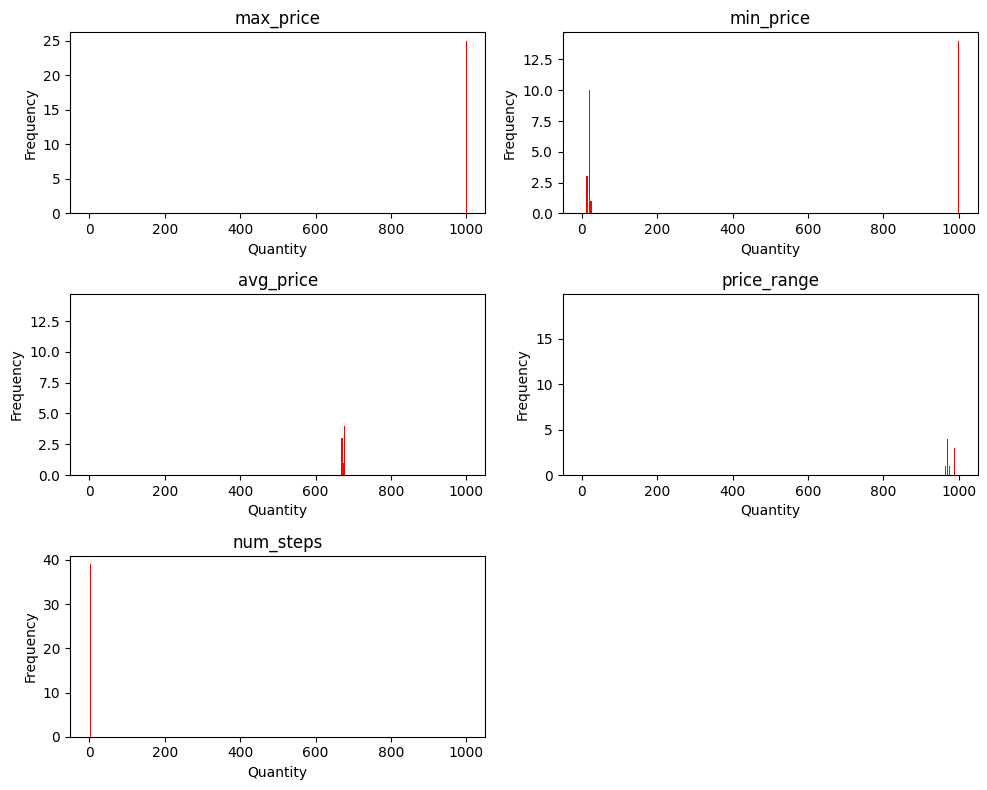

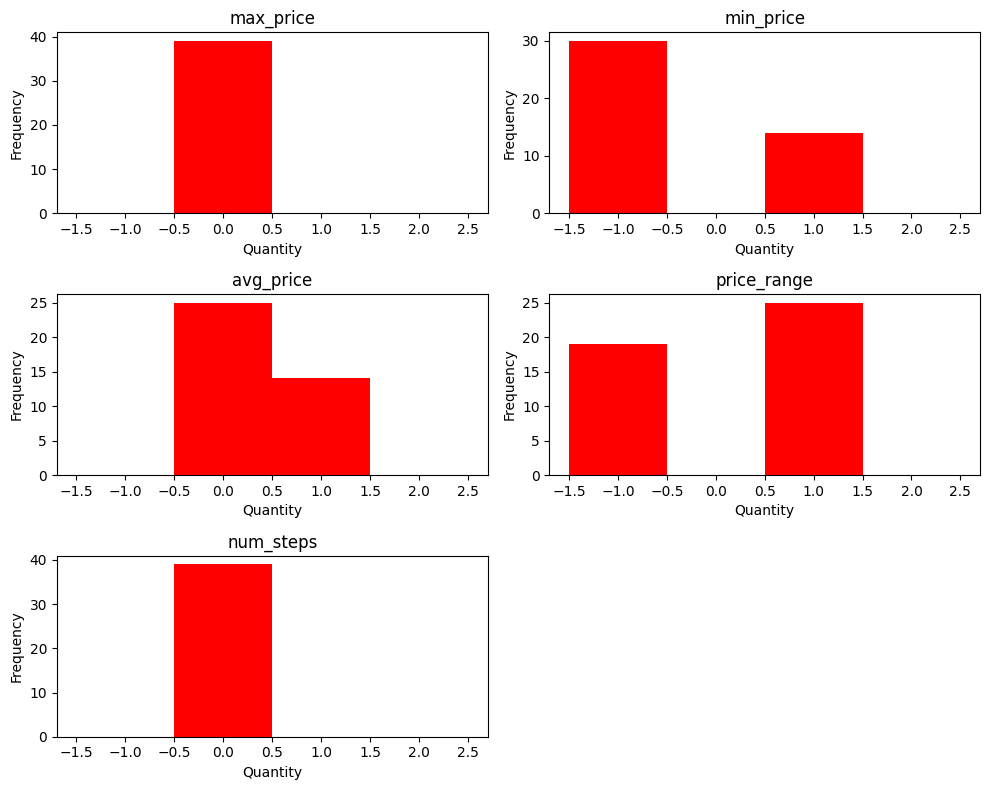

In [22]:
draw_distribution(df_valid_feat)
draw_distribution(df_valid_feat_scaled)

In [23]:
plot_dist_mat(df_valid_feat_scaled)

## Hypothesis Testing
check which cluster each bidding belongs to

In [24]:
validation_labels = kmeans.predict(df_valid_feat_scaled)
df_valid_feat_scaled['cluster_label'] = validation_labels

cluster_labels_valid = df_valid_feat_scaled[['cluster_label']].copy()

from draw_bid_curve import draw_bid_curves_for_multiple_days_2d
draw_bid_curves_for_multiple_days_2d(df_valid, HOUR, cluster_labels_valid)